# Redes neuronales (1)

## Ejemplo 2



## Leer datos
Los graficaremos para verificar que fueron bien leídos


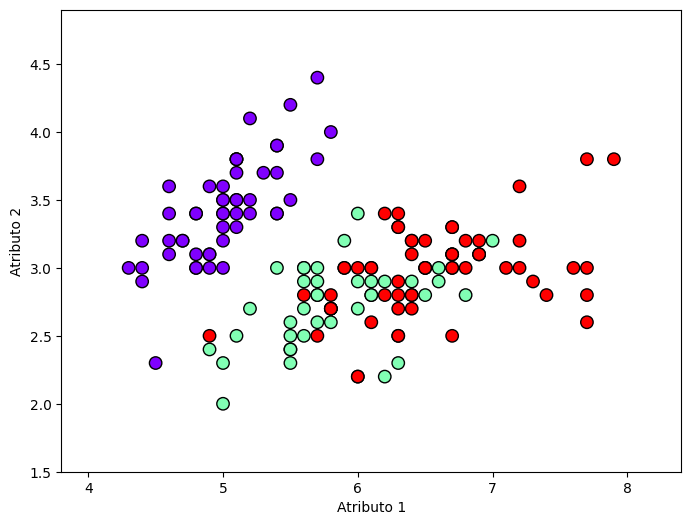

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

data = load_iris()
X = data.data
y = data.target


# Graficar datos
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow,
            edgecolor='k', s=80)
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

plt.show()

## Crear un modelo de red neuronal

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.activations import sigmoid, tanh, relu, softmax
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
X = X[0:100,:] #Take the first two classes only
y = data.target
y = y[0:100] #Take the first two classes only

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rows, cols = X.shape

model = Sequential() #Creamos el objeto vacío de la red neuronal
del(model)

model = Sequential()
# Datos de entrada y primera capa oculta
model.add(Dense(50, input_shape=(cols,), activation='tanh'))

# Segunda capa oculta
model.add(Dense(10*cols, activation='tanh')) #2nd hidden layer
# model.add(Dense(units=10*cols)) #Also 2nd. hidden layer
# model.add(Activation('tanh')) #With an activation layer

# Capa de salida
model.add(Dense(units=1, activation='sigmoid')) #Output layer

# Unir el modelo
model.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, verbose=3,
          validation_data=(X_test, y_test))
model.summary()
print(f'El dataset tiene {rows} filas y {cols} columnas')

# Evaluar el modelo para saber qué tan bien se comporta
eval = model.evaluate(X_test, y_test)
print(eval)

# Realizar una clasificación con el modelo entrenado
yhat = model.predict(X_test)
# print(yhat)

print(f'El error fue {eval[0]} y el porcentaje de clasificación {100*eval[1]}%')



Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

### ¿Qué pasa si tenemos más de dos clases?
Debemos modificar la forma en cómo visualizamos las clases. Normalmente: 0, 1, 2; pero debemos cambiarlas a vectores one-hot, de forma que la clase 0 = [1,0,0], la clase 1 = [0,1,0] y la tercera clase (clase 2) = [0,0,1]

In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn import datasets

iris = datasets.load_iris()
yy = iris.target
y = to_categorical(yy)
print('Classes:\n',yy)
print('\nCategorical:\n',y)

Classes:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Categorical:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar los datos y acomodar la salida
data = load_iris()
X = data.data
yy = data.target
y = to_categorical(yy)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

rows, cols = X.shape

# Crear la estructura de la red neuronal
model = Sequential() #Create the Sequential object
model.add(Dense(5, input_shape=(cols,), activation='relu')) #Input and 1st hidden layer
model.add(Dense(units=5, activation='relu')) #2nd hidden layer
model.add(Dense(units=3, activation='softmax')) #Output layer

# Unir el modelo
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=1e-2)
epochs=500
model.compile(optimizer=sgd,loss='mse', metrics=['accuracy'])

# Guardar el comportamiento del modelo en cada epoch
history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, verbose=3,
                    validation_data=(X_test, y_test))
model.summary()

# Evaluar el modelo
eval = model.evaluate(X_test, y_test)
print(eval)

mnames = model.metrics_names
print(mnames[0])
print(mnames[1])
print(mnames)

print(f'\nEl error fue {eval[0]} y el porcentaje de clasificación {100*eval[1]}%')


Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

### Graficar el comportamiento de la red


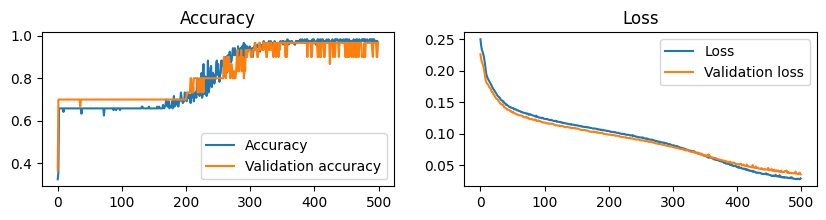

In [10]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()